In [1]:
# imports 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cm = plt.get_cmap("tab20c")
cm3 = plt.get_cmap('Set3')

In [2]:
def condense_columns(row):
    # Combine if 'question_type' is 'integral'
    if row['question_type'] == 'integral':
        return f"{row['question_type']} ({row['answer_type']})"
    else:
        return row['question_type']

### TEST (HELDOUT)

In [14]:
test = pd.read_csv('../data/heldout_HARDMath.csv') 

test['condensed_type'] = test.apply(condense_columns, axis=1)
counts = test['condensed_type'].value_counts().sort_index()

In [15]:
counts

condensed_type
ODE                               140
integral (list)                   143
integral (math_expression)        147
nondimensionalization_numeric     170
nondimensionalization_symbolic    170
polynomial_roots                  140
polynomial_roots_corrections      150
Name: count, dtype: int64

In [16]:
# remove polynomial root corrections
# counts.drop(counts.tail(1).index, inplace=True)

In [17]:
print(counts)

condensed_type
ODE                               140
integral (list)                   143
integral (math_expression)        147
nondimensionalization_numeric     170
nondimensionalization_symbolic    170
polynomial_roots                  140
polynomial_roots_corrections      150
Name: count, dtype: int64


In [18]:
nondim_counts = counts[counts.index.str.contains('nondim', case=False)]
poly_counts = counts[counts.index.str.contains('polynomial', case=False)]
ode_counts = counts[counts.index.str.contains('ode', case=False)]
int_counts = counts[counts.index.str.contains('integral', case=False)]

labels = counts.index
sizes = counts.values

In [19]:
print(sizes)

[140 143 147 170 170 140 150]


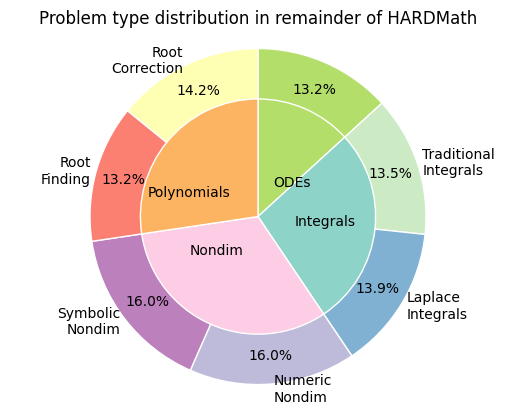

In [28]:
fig, ax = plt.subplots()

type_colors = cm((np.arange(4)*4)+1)
subtype_colors = cm(np.array([2,6,7,10,11,14,15]))

type_colors = cm3(np.array([6,0,7,5]))
subtype_colors = cm3(np.array([6,10,4,2,9,3,1])) # 8->2, 3->7->5

ax.pie([ode_counts.sum(), int_counts.sum(), nondim_counts.sum(), poly_counts.sum()], 
       labels=['ODEs', 'Integrals', 'Nondim', 'Polynomials'], 
       colors=type_colors, 
       #autopct='%1f%%', 
       startangle=90, 
       counterclock=False, 
       wedgeprops=dict(edgecolor='w'),
       labeldistance=0.22, 
       # pctdistance=0.52, 
       rotatelabels=False)

# outer circle -> subtypes
ax.pie(sizes, 
       labels=['', 'Traditional\nIntegrals', 'Laplace\nIntegrals', 'Numeric\nNondim', 'Symbolic\nNondim', 'Root\nFinding'],#, 'Root\nCorrection'],
       radius=1, 
       colors=subtype_colors, 
       autopct='%1.1f%%', 
       startangle=90, 
       counterclock=False, 
       wedgeprops=dict(width=0.3, edgecolor='w'),
       #wedgeprops=dict(edgecolor='w'),
       labeldistance=1.03, 
       pctdistance=0.83, 
       rotatelabels=False)

plt.title('Problem type distribution in remainder of HARDMath')
ax.axis('equal')
plt.savefig('heldout_dist.png')
plt.show()

### MINI-TEST (EVAL)

In [10]:
testmini = pd.read_csv('../evaluation/data/eval_HARDMath.csv')
testmini['condensed_type'] = testmini.apply(condense_columns, axis=1)
countsmini = testmini['condensed_type'].value_counts().sort_index()

In [11]:
countsmini

condensed_type
ODE                               54
integral (list)                   60
integral (math_expression)        60
nondimensionalization_numeric     64
nondimensionalization_symbolic    65
polynomial_roots                  63
Name: count, dtype: int64

In [12]:
nondim_countsmini = countsmini[countsmini.index.str.contains('nondim', case=False)]
poly_countsmini = countsmini[countsmini.index.str.contains('polynomial', case=False)]
ode_countsmini = countsmini[countsmini.index.str.contains('ode', case=False)]
int_countsmini = countsmini[countsmini.index.str.contains('integral', case=False)]

labelsmini = countsmini.index
sizesmini = countsmini.values

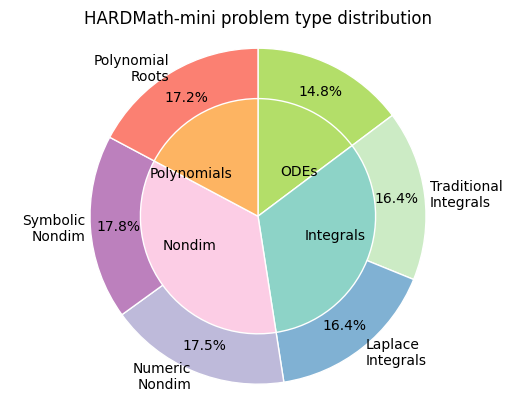

In [27]:
fig, ax = plt.subplots()

# type_colors = cm((np.arange(4)*4)+1)
# subtype_colors = cm(np.array([2,6,7,10,11,14]))

ax.pie([ode_countsmini.sum(), int_countsmini.sum(), nondim_countsmini.sum(), poly_countsmini.sum()], 
       labels=['ODEs', 'Integrals', 'Nondim', 'Polynomials'], 
       colors=type_colors, 
       #autopct='%1.0f%%', 
       startangle=90, 
       counterclock=False, 
       wedgeprops=dict(edgecolor='w'),
       labeldistance=0.3, 
       pctdistance=0.32, 
       rotatelabels=False)

# outer circle -> subtypes
ax.pie(sizesmini, 
       labels=['', 'Traditional\nIntegrals', 'Laplace\nIntegrals', 'Numeric\nNondim', 'Symbolic\nNondim', 'Polynomial\nRoots'], 
       radius=1, 
       colors=subtype_colors, 
       autopct='%1.1f%%', 
       startangle=90, 
       counterclock=False, 
       wedgeprops=dict(width=0.3, edgecolor='w'),
       #wedgeprops=dict(edgecolor='w'),
       labeldistance=1.03, 
       pctdistance=0.83, 
       rotatelabels=False)

plt.title(f'HARDMath-mini problem type distribution')
ax.axis('equal')
plt.savefig('eval_dist.png')
plt.show()